# Google Play Store Data Cleaning & Exploration

In [110]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib

Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw_playstore_data.csv")

pd.set_option('display.max_columns', None)

df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 1. Data Overview

In [112]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()

Dataset Shape: (2312944, 24)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool

## 2. Analyzing Missing Values

                   Missing Values  Percentage
Developer Website          760835   32.894657
Privacy Policy             420953   18.199879
Released                    71053    3.071972
Rating                      22883    0.989345
Rating Count                22883    0.989345
Minimum Android              6530    0.282324
Size                          196    0.008474
Currency                      135    0.005837
Minimum Installs              107    0.004626
Installs                      107    0.004626
Developer Id                   33    0.001427
Developer Email                31    0.001340
App Name                        5    0.000216
Maximum Installs                0    0.000000
App Id                          0    0.000000
Category                        0    0.000000
Price                           0    0.000000
Free                            0    0.000000
Last Updated                    0    0.000000
Content Rating                  0    0.000000
Ad Supported                    0 

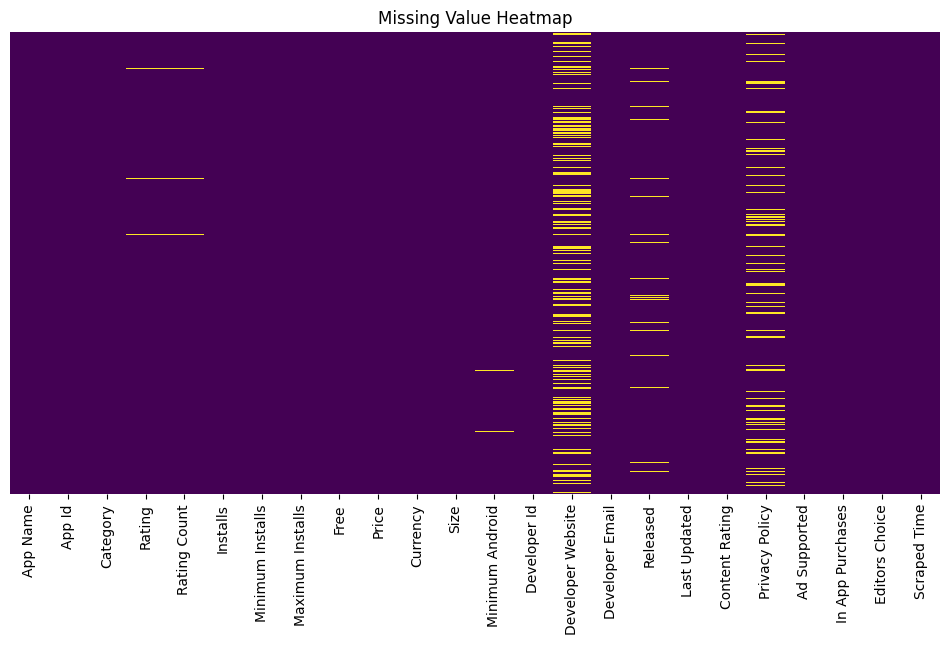

In [113]:
# Count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Display missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

## 3. Data Cleaning & Type Conversion

In [114]:
# Drop less useful columns with high missing values
df.drop(columns=["Developer Website", "Privacy Policy"], inplace=True)

# Remove rows with crucial missing values
df.dropna(subset=["App Name", "Developer Id", "Developer Email", "Installs", "Minimum Installs", "Size"], inplace=True)

# Convert installs to integer
df["Installs"] = df["Installs"].str.replace("+", "", regex=False).str.replace(",", "", regex=False).astype(np.int64)
df["Minimum Installs"] = df["Minimum Installs"].astype(np.int64)

# Convert date columns and fill the missing values
df["Released"] = pd.to_datetime(df["Released"], errors="coerce").fillna(pd.Timestamp("2000-01-01"))
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")
df["Scraped Time"] = pd.to_datetime(df["Scraped Time"], errors="coerce")

# Convert rating-related columns and fill the missing values
df["Rating"] = df["Rating"].fillna(0.0) 
df["Rating Count"] = df["Rating Count"].fillna(0).astype(np.int64)

# Fill missing values in text-based columns with "Unknown"
text_cols = ["Minimum Android"]
df[text_cols] = df[text_cols].fillna("Unknown")

# Convert 'Size' column to MB and fill the missing values
df["Size"] = df["Size"].str.replace("M", "000000").str.replace("k", "000").str.replace("G", "000000000")
df['Size'] = pd.to_numeric(df['Size'] , errors='coerce')
df['Size'] = df['Size'].fillna(df['Size'].mean())
df['Size'] = df['Size'].apply(lambda x: x/1000000)

# Fix Problematic Quotes
df['App Name'] = df['App Name'].apply(lambda x: x.replace("'", "''"))
df['Developer Id'] = df['Developer Id'].apply(lambda x: x.replace("'", "''"))

## 4. Saving Cleaned Data

In [ ]:
categories_file = "../data/cleaned_categories.csv"
developers_file = "../data/cleaned_developers.csv"
apps_file = "../data/cleaned_apps.csv"

# Save Categories
categories = df["Category"].dropna().unique()
category_df = pd.DataFrame({"id": range(1, len(categories) + 1), "name": categories})
category_df.to_csv(categories_file, index=False)

print(f"Saved {len(category_df)} categories to '{categories_file}'.\n")

# Save Developers
developers_df = df[["Developer Id", "Developer Email"]].dropna()
developers_df = developers_df.rename(columns={"Developer Id": "name", "Developer Email": "email"})
developers_df['id'] = range(1, len(developers_df) + 1)
developers_df = developers_df[['id', 'name', 'email']]
developers_df.to_csv(developers_file, index=False)

print(f"Saved {len(developers_df)} developers to '{developers_file}'.\n")

# Save Apps
category_map = {category: idx + 1 for idx, category in enumerate(categories)}
apps_df = df.copy()
apps_df['category_id'] = apps_df['Category'].map(category_map)

developer_map = {name: idx + 1 for idx, name in enumerate(developers_df['name'])}
apps_df['developer_id'] = apps_df['Developer Id'].map(developer_map)

apps_df['id'] = range(1, len(apps_df) + 1)

apps_df = apps_df.rename(columns={
    "App Name": "app_name",
    "App Id": "app_id",
    "Rating": "rating",
    "Rating Count": "rating_count",
    "Installs": "installs",
    "Minimum Installs": "min_installs",
    "Maximum Installs": "max_installs",
    "Free": "free",
    "Price": "price",
    "Currency": "currency",
    "Size": "size",
    "Minimum Android": "min_android",
    "Released": "released",
    "Last Updated": "last_updated",
    "Content Rating": "content_rating",
    "Ad Supported": "ad_supported",
    "In App Purchases": "in_app_purchases",
    "Editors Choice": "editors_choice",
    "Scraped Time": "scraped_time"
})

apps_df = apps_df[[
    "id", "app_id", "app_name", "category_id", "developer_id", "rating", "rating_count",
    "installs", "min_installs", "max_installs", "free", "price", "currency",
    "size", "min_android", "released", "last_updated", "content_rating",
    "ad_supported", "in_app_purchases", "editors_choice", "scraped_time"
]]

apps_df.to_csv(apps_file, index=False)

print(f"Saved {len(apps_df)} apps to '{apps_file}'.\n")

Saved 48 categories to '../data/cleaned_categories.csv'.

Saved 758290 developers to '../data/cleaned_developers.csv'.

Saved 2312573 apps to '../data/cleaned_apps.csv'.

